In [47]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/experiment_metadata/regression_to_baseline/regression_to_baseline_adascog13.csv'
sheet = None

In [48]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/composite_methods/regression_to_baseline_adascog13'

In [51]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
df = cal_palm.read_and_display_data()

,Regression_Method,Point_R_squared,lower_Ci,upper_Ci,Mean,Std,Permuted_P_val_from_CSF_Equivalet,Bonf_C._T_Test_P_Val,F_Val_P_Val,CSFGM_Vs_Others
0,Z_CSF_all_lobes,0.360,0.2800,0.70,0.48,0.11,NaN,NaN,NaN,NaN
1,Z_CSF_sbm_lobes,0.340,0.2300,0.59,0.39,0.09,NaN,NaN,NaN,NaN
2,W_CSF_all_lobes,0.120,0.0800,0.45,0.24,0.09,NaN,NaN,NaN,NaN
3,W_CSF_sbm_lobes,0.110,0.0400,0.34,0.17,0.08,NaN,NaN,NaN,NaN
4,Z_CT_all_lobes,0.230,0.1400,0.51,0.30,0.10,NaN,NaN,NaN,NaN
5,Z_CT_sbm_lobes,0.180,0.0800,0.45,0.24,0.09,NaN,NaN,NaN,NaN
6,W_CT_all_lobes,0.260,0.1200,0.57,0.32,0.11,NaN,NaN,NaN,NaN
7,W_CT_sbm_lobes,0.160,0.0600,0.40,0.21,0.09,NaN,NaN,NaN,NaN
8,Z_GM_all_lobes,0.370,0.2000,0.69,0.45,0.12,NaN,NaN,NaN,NaN
9,Z_GM_sbm_lobes,0.060,0.0200,0.35,0.14,0.09,NaN,NaN,NaN,NaN


In [52]:
import pandas as pd
# df = pd.read_csv(csv_path)
# df = df[df['Method'] != 'All']
df = df.loc[27:, :]
df = df.loc[:, ~df.columns.str.contains('_P')]
df

,Regression_Method,Point_R_squared,lower_Ci,upper_Ci,Mean,Std,CSFGM_Vs_Others
27,Z_CSF_T,0.35,0.28,0.70,0.47,0.11,0.008
28,Z_CSFGM_T,0.52,0.40,0.77,0.59,0.10,NaN
29,Z_CSFWM_T,0.38,0.30,0.66,0.47,0.09,0.026
30,Z_CSFGMWM_T,0.41,0.32,0.72,0.51,0.10,0.023
31,Z_CSF_CT,0.36,0.30,0.72,0.48,0.11,0.010
32,ZW_Radiologist_all_lobes,0.39,0.29,0.67,0.48,0.09,NaN


In [32]:
df.pop('AtrophyMethod')
df.pop('Smooth')

KeyError: 'AtrophyMethod'

Simple Bar Plot

In [53]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df, x_col, y_col, hue=None, palette="tab10"):
    ax = sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette)
    return ax 
    
def plot_point_as_diamond(df, ax, point_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    plt.scatter(x=x_coords, y=df[point_col], color='k', marker='D', facecolors='none')
    
def plot_error_bars(df, ax, err_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df[err_col], capsize=6, fmt="none", c="k")

def show_and_save_plot(out_dir=None):
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'barplot.svg'))
    plt.show()

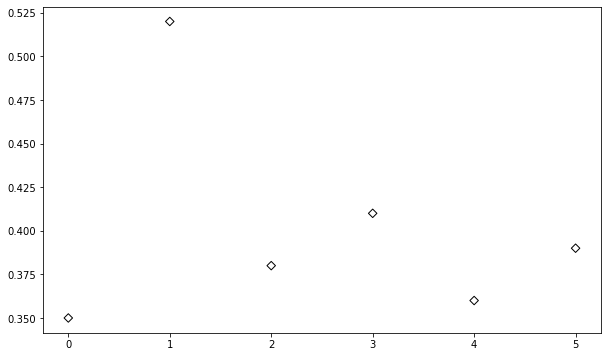

In [56]:
# Call the plotting functions
plt.figure(figsize=(10,6))
# ax = plot_barplots(df, 'Regression_Method', 'Mean')
# plot_error_bars(df=df, ax=ax, err_col='Std')
plot_point_as_diamond(df=df, ax=ax, point_col='Point_R_squared')
show_and_save_plot(out_dir)

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [ ]:
df

In [33]:
import pandas as pd

def melt_dataframe(df):
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=['Method'], var_name='Variable', value_name='Rho')
    
    # Extract the region names from the 'Region' column
    melted_df['Method'] = melted_df['Method'].str.split(' ', expand=True)[0]
    
    return melted_df

melted_df = melt_dataframe(df)
melted_df

,Method,Variable,Rho
0,Z0_CSF_T,Cerebellum_R,0.34
1,Z0_CSFGM_T,Cerebellum_R,0.42
2,Z0_CSFWM_T,Cerebellum_R,0.38
3,Z0_CSFCT_T,Cerebellum_R,0.34
4,Z0_CSFGMWM_T,Cerebellum_R,0.44
5,Radiologist,Cerebellum_R,0.06
6,Z0_CSF_T,MTL_R,0.66
7,Z0_CSFGM_T,MTL_R,0.66
8,Z0_CSFWM_T,MTL_R,0.66
9,Z0_CSFCT_T,MTL_R,0.66


In [34]:
data_df.columns

NameError: name 'data_df' is not defined

In [35]:
df

,Method,Cerebellum_R,MTL_R,Subcortex_R,Temporal_R,Parietal_R,Frontal_R,Occipital_R
23,Z0_CSF_T,0.34,0.66,0.50,0.55,0.42,0.39,0.48
24,Z0_CSFGM_T,0.42,0.66,0.38,0.57,0.44,0.45,0.55
25,Z0_CSFWM_T,0.38,0.66,0.57,0.56,0.45,0.41,0.49
26,Z0_CSFCT_T,0.34,0.66,0.50,0.55,0.43,0.39,0.48
27,Z0_CSFGMWM_T,0.44,0.66,0.50,0.56,0.44,0.47,0.53
28,Radiologist,0.06,0.40,0.51,0.47,0.13,0.36,0.24


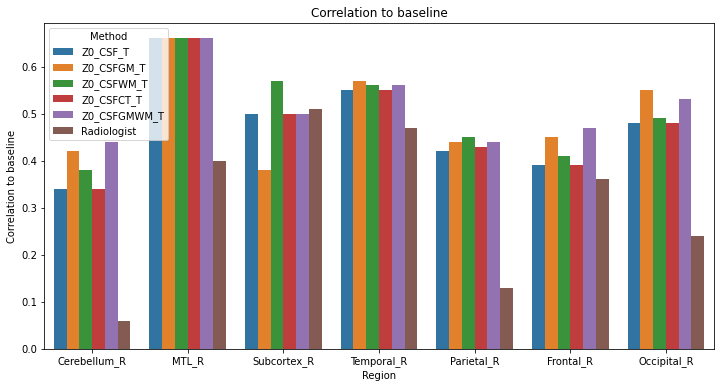

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Variable', y='Rho', hue='Method', data=melted_df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Correlation to baseline')
plt.ylabel('Correlation to baseline')
plt.xlabel('Region')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [ ]:
df


In [ ]:
# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Inference', value_name='Accuracy', ignore_index=False).reset_index()

# Generate Grouped Barplot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Method', y='R-Squared', hue='Variable', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot.svg')
# plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


# Generate Boxplot

In [ ]:
# df.drop(13, inplace=True)
# df.drop(17, inplace=True)
# df.drop(14, inplace=True)


In [ ]:
melted_df

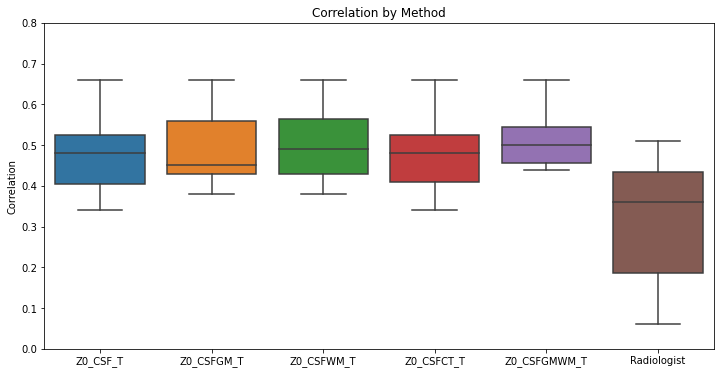

In [37]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.boxplot(x='Method', y='Rho', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Correlation by Method')
plt.xlabel('')
plt.ylabel('Correlation')
plt.ylim((0,0.8))

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'boxplot_v2.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot (optional)
plt.show()

Test the Box PLot

In [12]:
melted_df.columns

Index(['Method', 'Variable', 'Rho'], dtype='object')

In [46]:
from calvin_utils.statistical_utils.kruskall_wallis import KruskalWallisTest
kwt = KruskalWallisTest(data=melted_df, value_column='Rho', group_column='Method')

Kruskal-Wallis Test Statistic: 7.7171
P-value: 0.1725
Conclusion: There is no statistically significant difference between groups.


# Stacked barplot

In [ ]:
data_df.columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

def plot_stacked_barplots(df, columns, out_dir):
    # Create a DataFrame to hold the counts for each response category for each question
    response_categories = df[columns].apply(pd.Series.value_counts).fillna(0).T

    # Normalize the counts to be on a scale of 0-1
    response_categories = response_categories.div(response_categories.sum(axis=1), axis=0)
    
    # Ensure consistent coloring using tab10
    cmap = plt.get_cmap('tab10')
    unique_responses = response_categories.columns
    colors = {response: cmap(i) for i, response in enumerate(unique_responses)}

    # Plotting the stacked bar plot
    ax = response_categories.plot(kind='bar', stacked=True, figsize=(20, 20), color=[colors[response] for response in unique_responses])

    # Annotating the plot with the normalized values
    for i in range(len(response_categories)):
        cumulative_sum = np.zeros(len(response_categories.columns))
        for j, response in enumerate(response_categories.columns):
            height = response_categories.iloc[i, j]
            cumulative_sum[j] = cumulative_sum[j-1] + height if j > 0 else height
            ax.text(i, cumulative_sum[j] - height / 2, f'{height:.2f}', ha='center', va='center', fontsize=12, color='black')

    # Customizing the plot
    plt.title('Normalized Stacked Bar Plot of Responses', fontsize=20)
    plt.ylabel('Proportion of Responses', fontsize=16)
    plt.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
    plt.xticks(range(len(columns)), [col.replace('_', ' ') for col in columns], rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)
    sns.despine()
    plt.tight_layout()
    
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'stacked_barplot.svg'))
    
    plt.show()

In [ ]:
# Likert Questions:
# columns_to_plot = [
#     'How_intuitive_was_the_software_assessment_compared_to_the_paper_test_',
#     'How_comfortable_were_you_navigating_through_the_software_',
#     'How_confident_do_you_feel_being_able_to_complete_the_test_on_your_own_',
#     'How_much_additional_value_do_you_see_this_assessment_bringing_to_your_medical_care_'
# ]
# Yes/No Questions:
columns_to_plot = [
    'Would_you_find_it_useful_if_you_could_take_the_test_before_your_appointment_and_talk_about_the_results_with_your_doctor_',
       'Would_you_recommend_this_assessment_to_someone_else_',
       'Would_being_able_to_take_this_test_remotely_help_your_care_',
       'Would_taking_this_test_alone_alleviate_the_stress_of_being_assessed_by_a_doctor_',
       'Would_taking_this_test_alone_alleviate_feelings_of_judgement_during_a_test_',
        'Would_you_trust_the_results_of_this_test_'
]
# Assuming 'df' is your DataFrame
plot_stacked_barplots(data_df, columns_to_plot, out_dir)


# 05 - Scatterplot a Value to a Classification